In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
def get_df(id):
    path = './' + 'RD_17_06/' + 'unity/' + 'Shovel' + '_' + id + '.csv'
    return pd.read_csv(path)

c_0 = get_df("C0")
c_1 = get_df("C1")
c_2 = get_df("C2")
p_0 = get_df("P0")
p_1 = get_df("P1")
p_2 = get_df("P2")

c_0.head(3)

,ts_datetime,ts_unix_ms,primary_grab_hand,pt_x,pt_y,pt_z,st_x,st_y,st_z,pv_x,...,hmd_x,hmd_y,hmd_z,ee_x,ee_y,ee_z,shovel_loaded_state,cube_max_target_reached,grab_count,collision_or_load_count
0,6/17/2025 5:53:30 PM,1750175610072,Right,-0.021357,0.094515,-0.002608,-0.118737,0.627318,-0.184090,-0.021302,...,-0.098375,0.794819,0.019389,-2.479354e-08,0.070000,0.740000,False,0,1,0
1,6/17/2025 5:53:30 PM,1750175610100,Right,-0.023016,0.091584,-0.005350,-0.119463,0.626224,-0.184293,-0.023016,...,-0.098237,0.791466,0.018577,-1.024046e-01,0.784453,-0.257796,False,0,1,0
2,6/17/2025 5:53:30 PM,1750175610114,Right,-0.023578,0.090324,-0.007610,-0.119198,0.626212,-0.184651,-0.023673,...,-0.098234,0.789974,0.018391,-1.014712e-01,0.784550,-0.256713,False,0,1,0


In [17]:
def scatter(df, title, ax):

    ptx = df["pt_x"]
    ptz = df["pt_z"]

    stx = df["st_x"]
    stz = df["st_z"]

    eex = df["ee_x"]
    eez = df["ee_z"]

    hmdx = df["hmd_x"]
    hmdz = df["hmd_z"]

    # Create a scatter plot

    alpha = 0.1

    ax.scatter(ptx, ptz, alpha=alpha)
    ax.scatter(stx, stz, alpha=alpha)
    ax.scatter(eex, eez, alpha=alpha)
    ax.scatter(hmdx, hmdz, alpha=alpha)

    ax.set_xlim([-1.75,0.25])
    ax.set_ylim([-0.25,1.75])

    ax.title.set_text(title)


    ax.set_xlabel('X [m]')
    ax.set_ylabel('Z [m]')

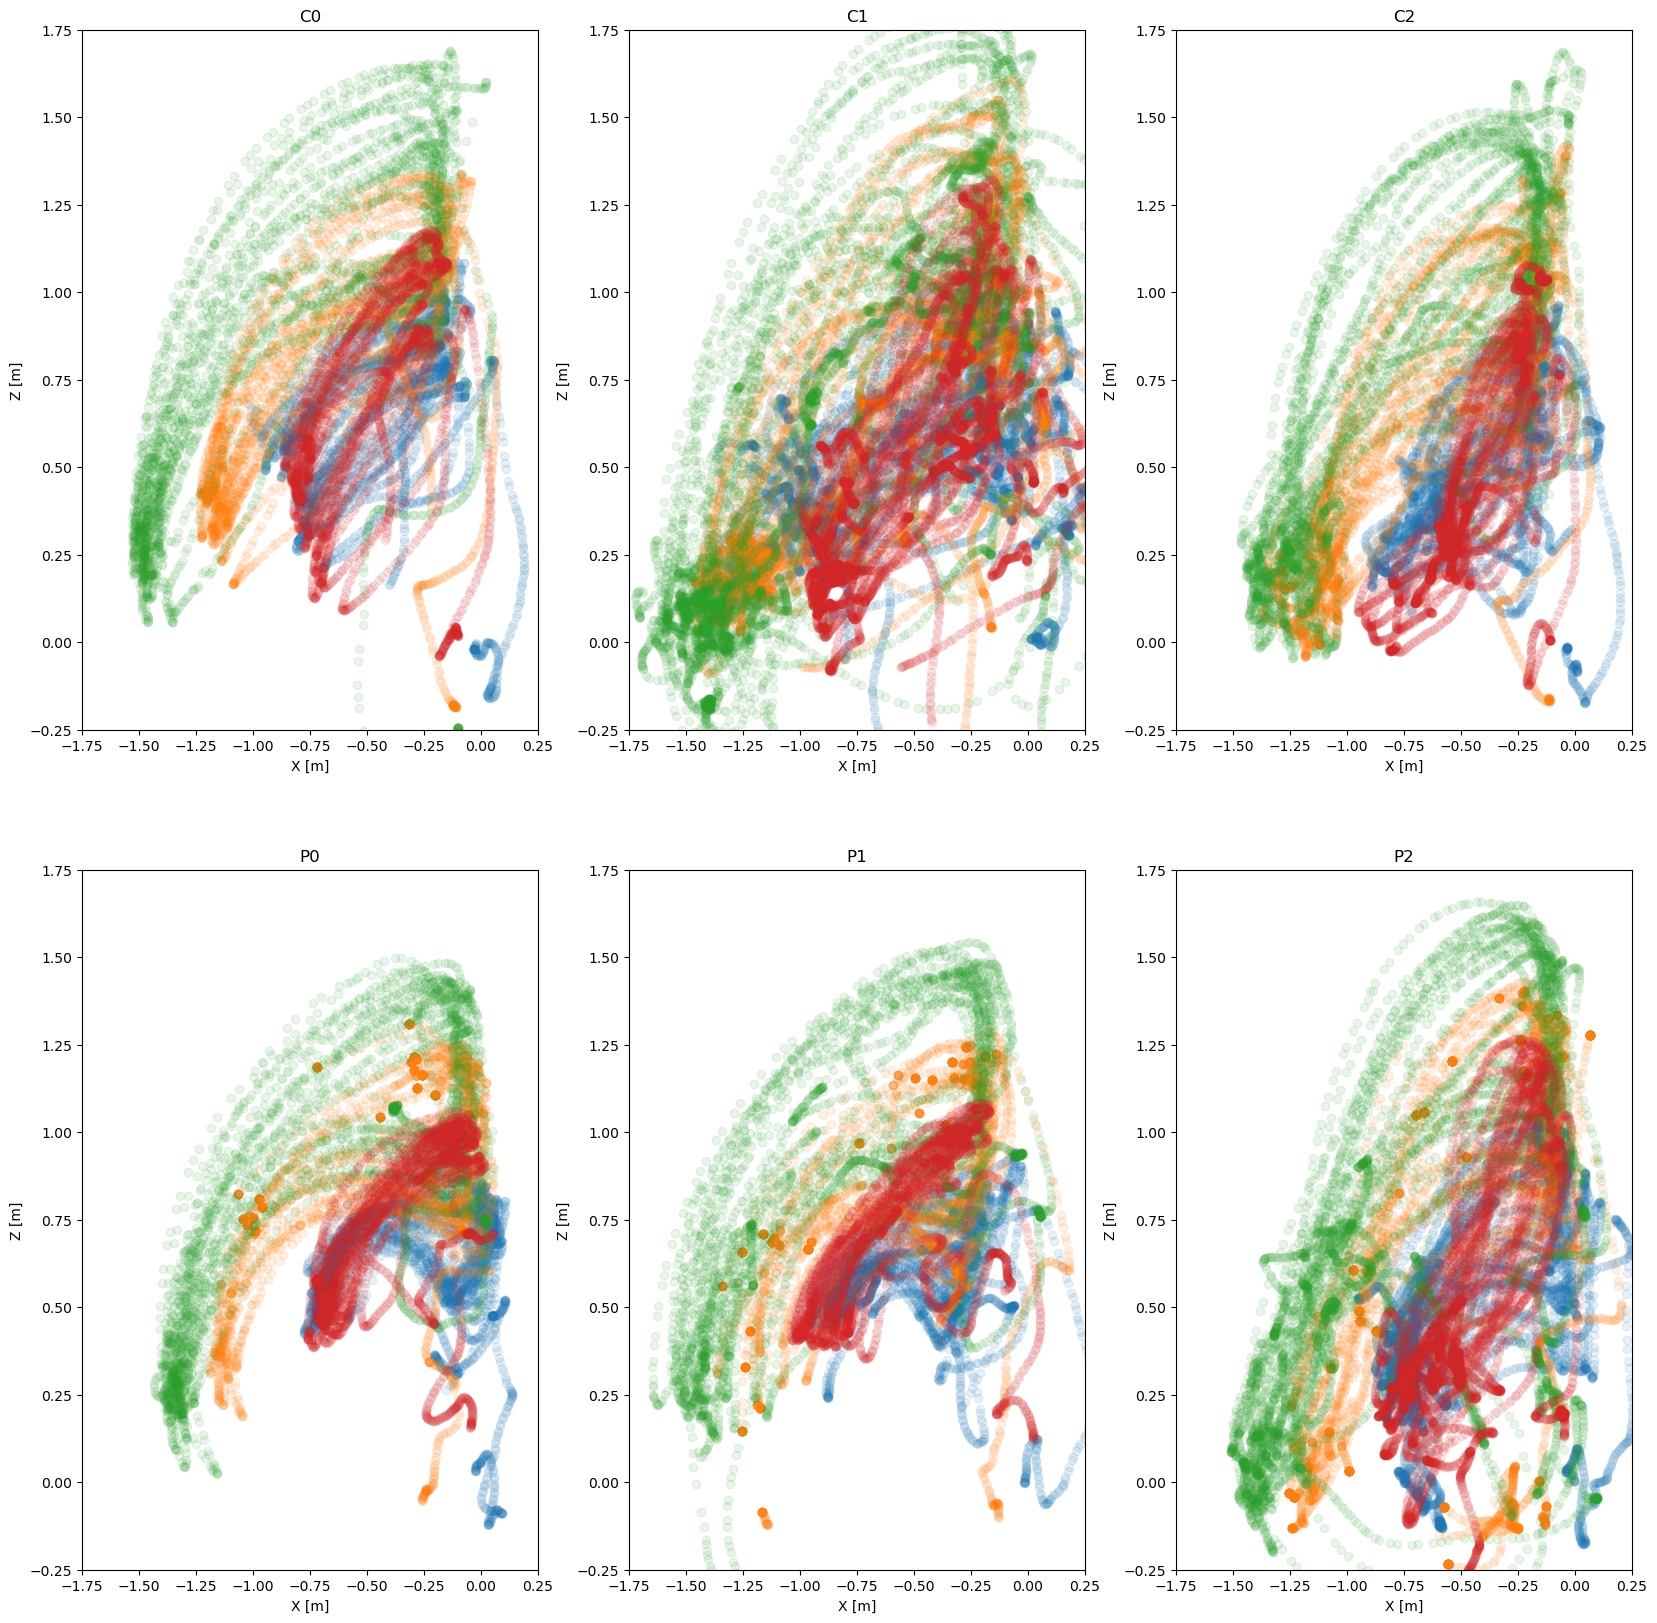

In [18]:
fig, axs = plt.subplots(2, 3)

fig.set_figwidth(20)
fig.set_figheight(20)

scatter(c_0, "C0", axs[0, 0])
scatter(c_1, "C1", axs[0, 1])
scatter(c_2, "C2", axs[0, 2])
scatter(p_0, "P0", axs[1, 0])
scatter(p_1, "P1", axs[1, 1])
scatter(p_2, "P2", axs[1, 2])

plt.show()

In [19]:
def heatmap(df, title, ax, tracking_pt):
    eex = df[tracking_pt+"_x"]
    eez = df[tracking_pt+"_z"]

    heatmap, xedges, yedges = np.histogram2d(eex, eez, bins=40, range=[[-1.75,0.25], [-0.25,1.75]])

    ax.title.set_text(title)
    # Plot the heatmap
    ax.imshow(heatmap.T, origin='lower', cmap='viridis', aspect='auto')
    

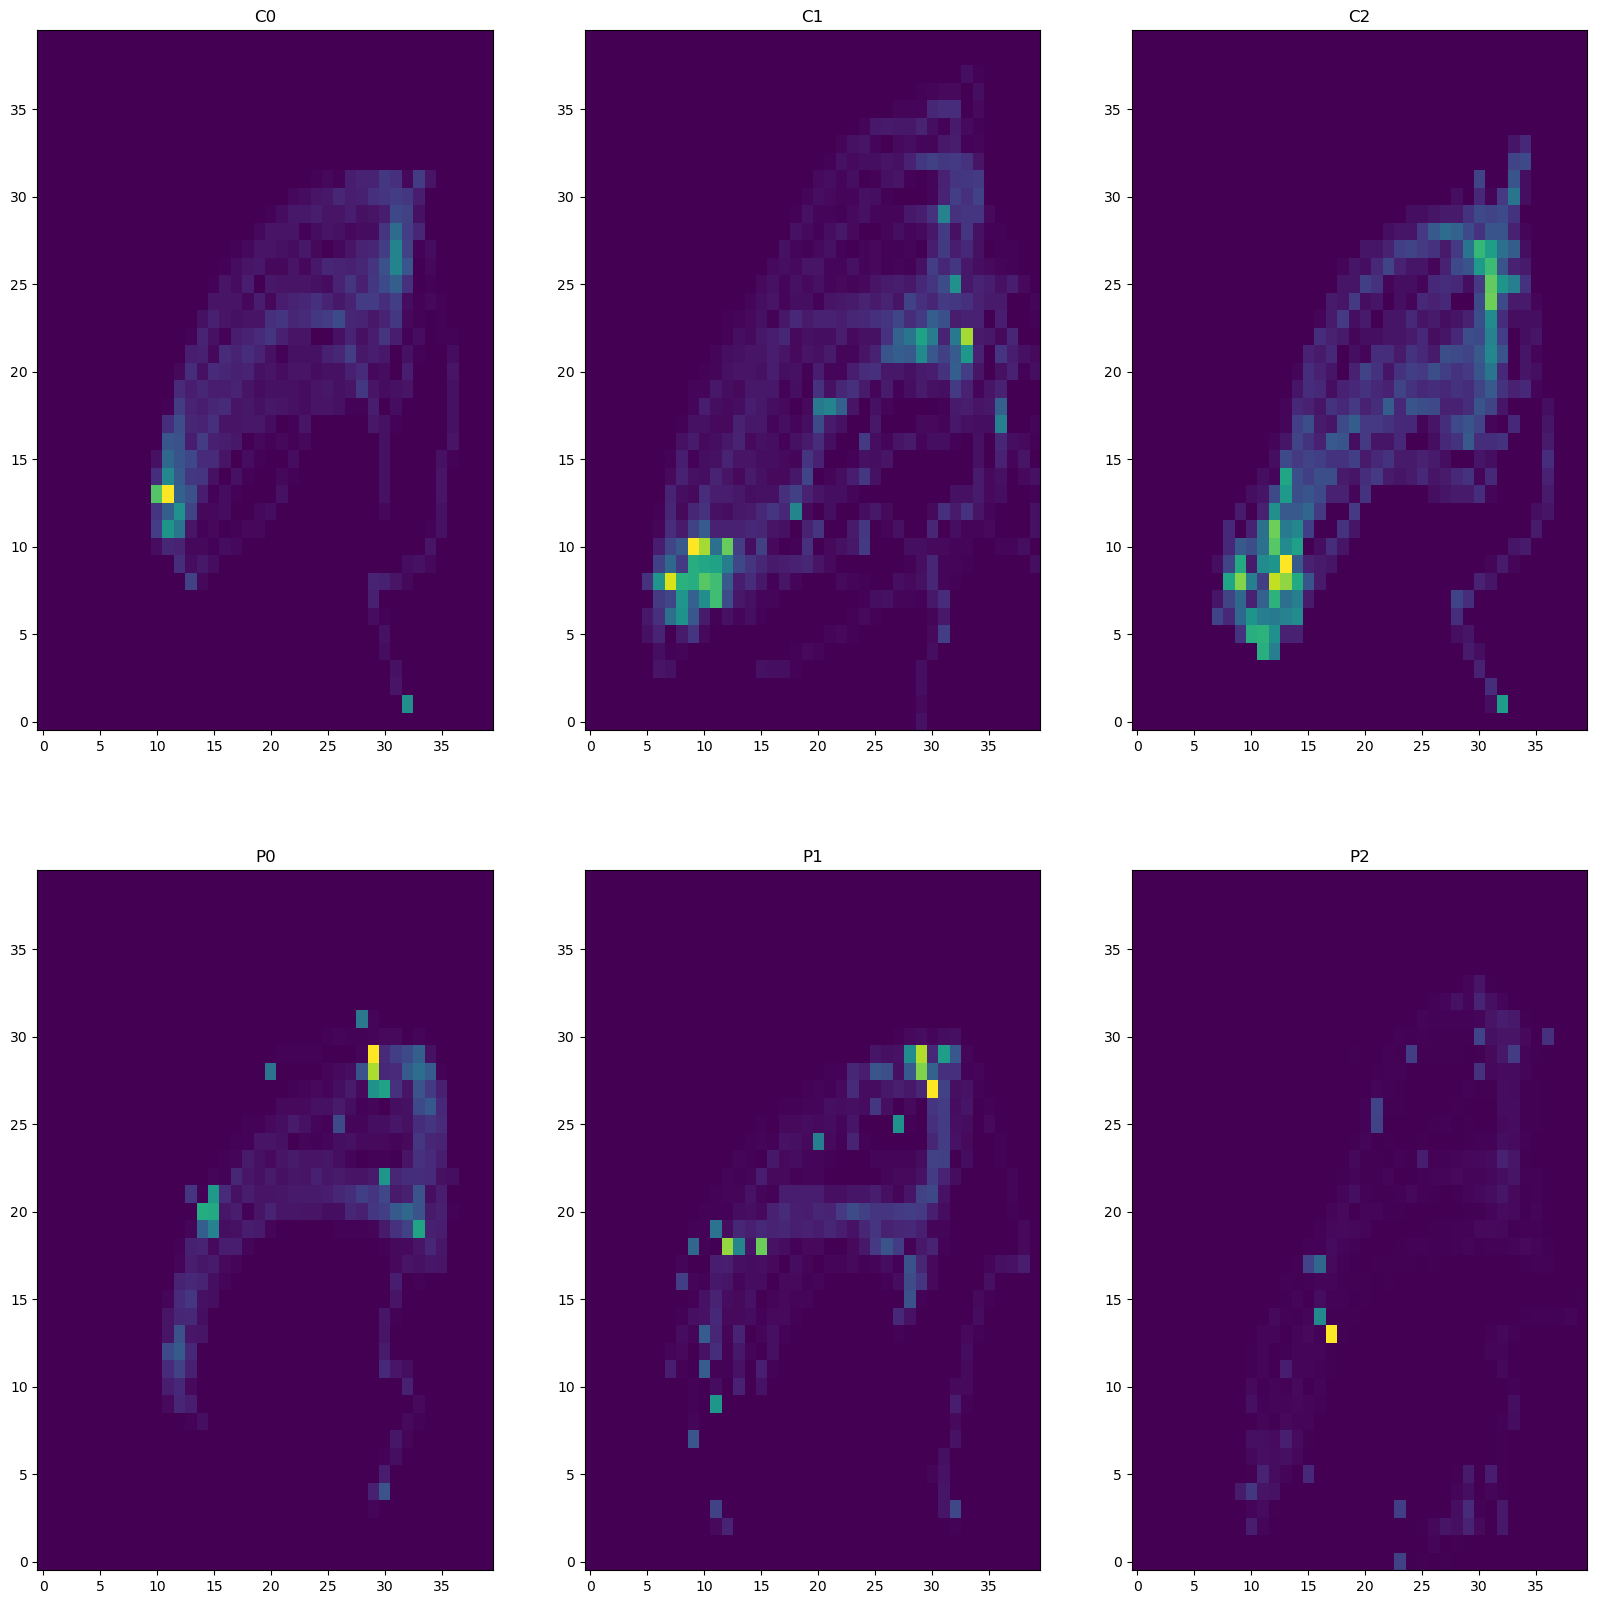

In [20]:
fig, axs = plt.subplots(2, 3)

fig.set_figwidth(20)
fig.set_figheight(20)

tracking_pt = "st"

heatmap(c_0, "C0", axs[0, 0], tracking_pt)
heatmap(c_1, "C1", axs[0, 1], tracking_pt)
heatmap(c_2, "C2", axs[0, 2], tracking_pt)
heatmap(p_0, "P0", axs[1, 0], tracking_pt)
heatmap(p_1, "P1", axs[1, 1], tracking_pt)
heatmap(p_2, "P2", axs[1, 2], tracking_pt)

plt.show()

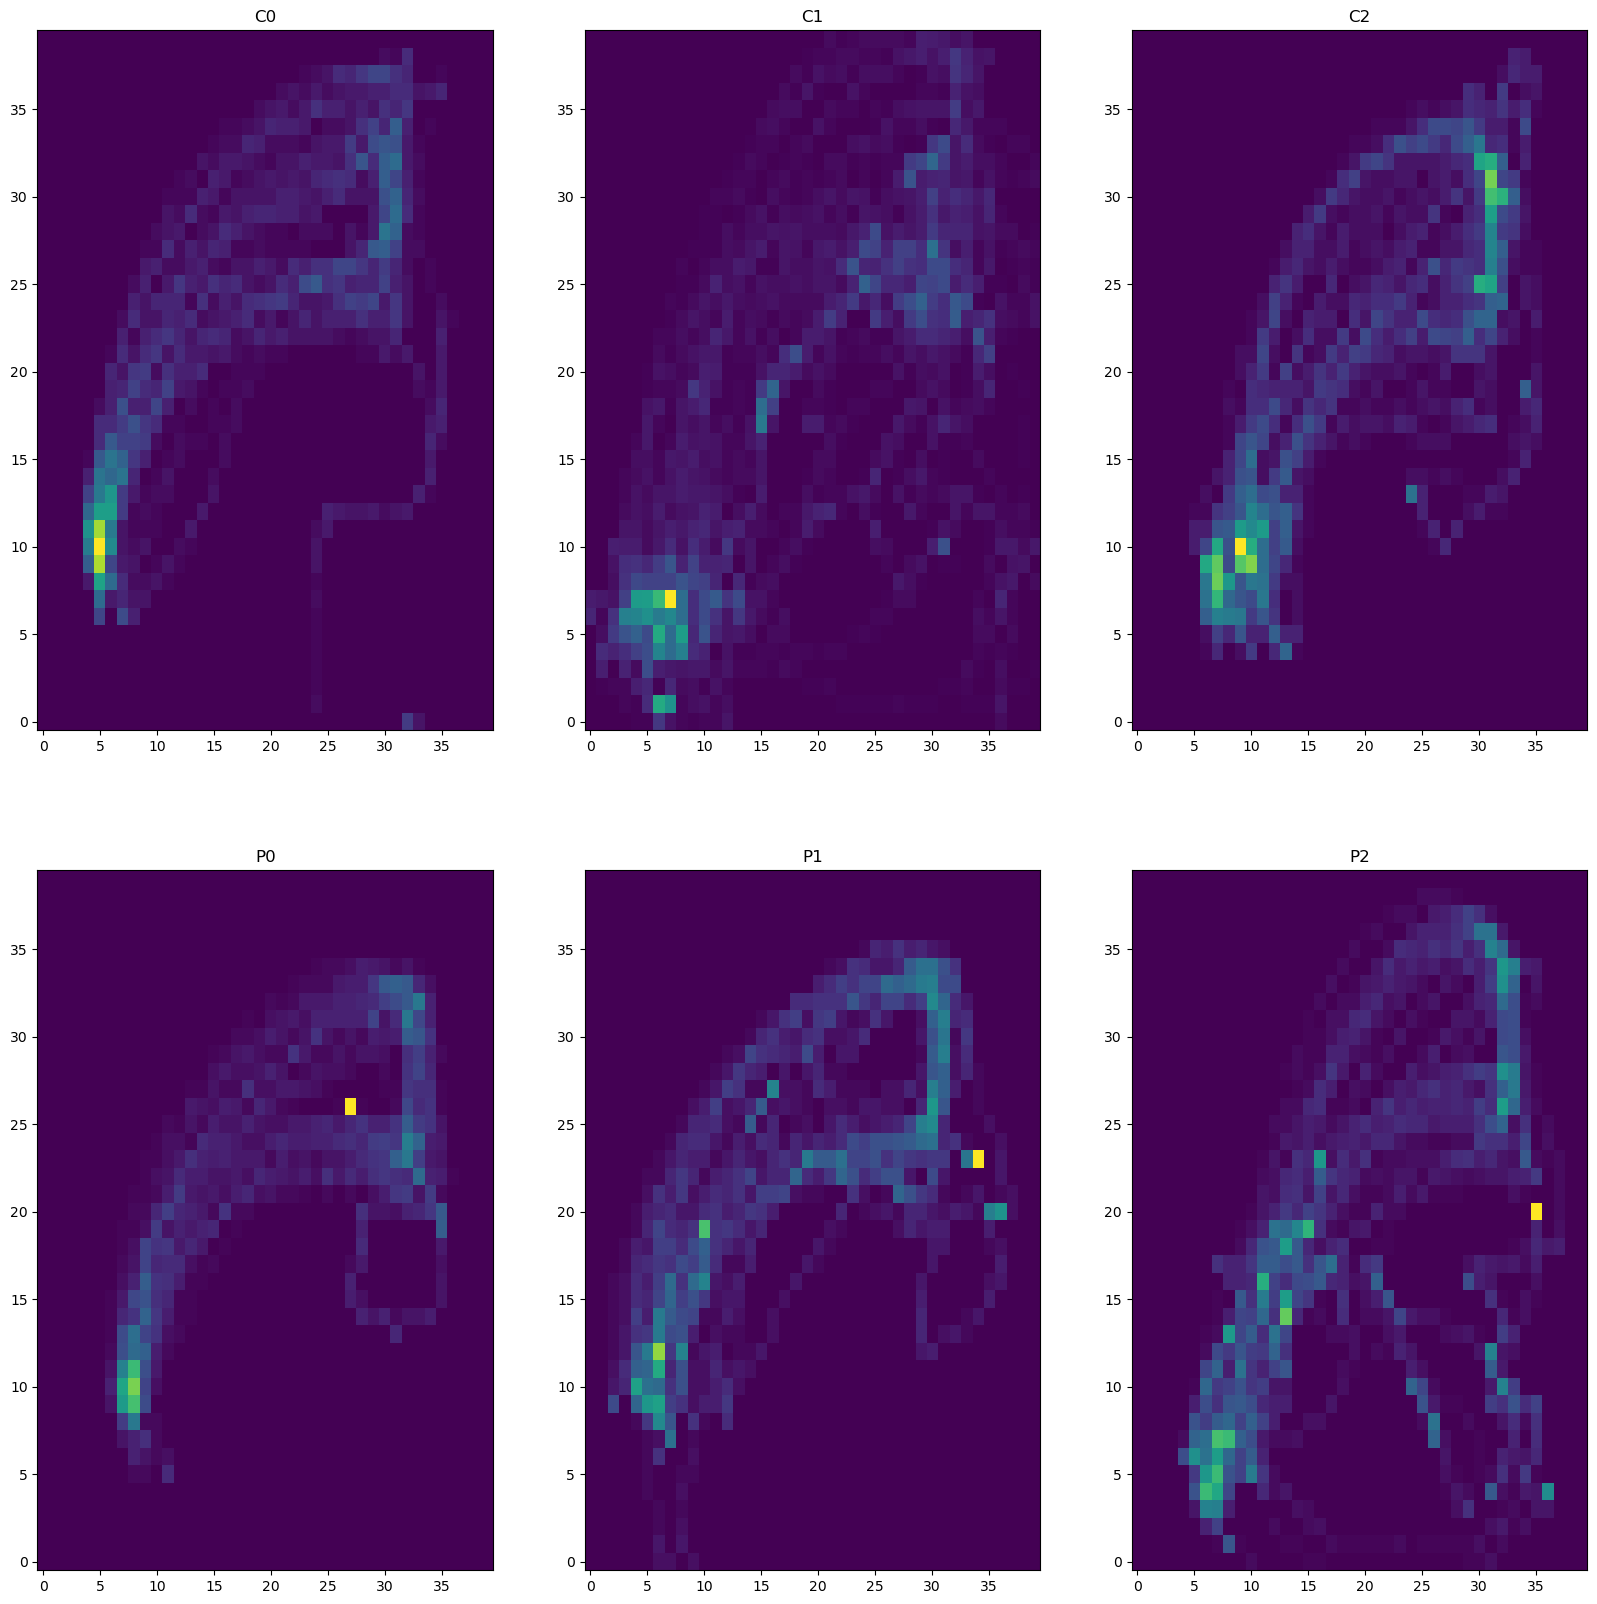

In [21]:
fig, axs = plt.subplots(2, 3)

fig.set_figwidth(20)
fig.set_figheight(20)

tracking_pt = "ee"

heatmap(c_0, "C0", axs[0, 0], tracking_pt)
heatmap(c_1, "C1", axs[0, 1], tracking_pt)
heatmap(c_2, "C2", axs[0, 2], tracking_pt)
heatmap(p_0, "P0", axs[1, 0], tracking_pt)
heatmap(p_1, "P1", axs[1, 1], tracking_pt)
heatmap(p_2, "P2", axs[1, 2], tracking_pt)

plt.show()